In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rng

In [5]:
def population(N, M, value=1):
    lattice = (value, (N,M))
    return np.full((N, M), value)

In [6]:
def plotpop(population, left=0, right=0, bottom=0, top=0): #add value to axes
    fig, ax = plt.subplots()
    im = ax.imshow(population, cmap = 'ocean', extent = (left, np.shape(population)[0]+right, np.shape(population)[1]+bottom, top))
    return im

A normal population is going to be 1s, immunized will be 0s, infected will be -1s

In [7]:
def randomperson(population):
    #make one variable x the width of the lattice: x = np.shape(lattice)[0]
    #make one variable y the height of the lattice: y = np.shape(lattice)[1]
    #rn_x is a random integer from 0 to x: rn_x = rng.randint(0,x)
    #rn_y is a random integer from 0 to y: rn_y = rng.randint(0,y)
    #define (rn_x, rn_y) in lattice: particle = lattice[rn_x, rn_y]
    x = np.shape(population)[0]
    y = np.shape(population)[1]
    rn_x = rng.randint(0,x)
    rn_y = rng.randint(0,y)
    person = (rn_x, rn_y)
    return person

In [8]:
def immunize(population, person):
    new_val = 0
    population[person] = new_val
    return population

In [9]:
def percimmune(perc, population):
    N = np.shape(population)[0]
    M = np.shape(population)[1]
    pop = N * M
    numimmune = int(perc * pop)
    i = 0
    while i < numimmune:
        r = randomperson(population)
        while population[r] == 0:
            r = randomperson(population)
        population = immunize(population, r)
        i += 1
    return population

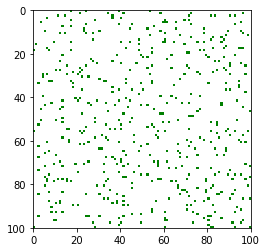

In [27]:
p = population(100,100)
newp = percimmune(.05, p)
plotpop(newp)

In [29]:
def infect(population, person):
    #set val to value of particle by index: val = lattice[particle]
    #define new value new_val = val * -1
    #assign particle new value: lattice[particle] == new_val
    val = population[person]
    new_val = (val * -1)
    population[person] = new_val
    return population